# 주성분 분석

In [1]:
import os
import numpy as np
import pandas as pd
import hds
from plt_rcs import *

In [2]:
df = pd.read_csv('https://bit.ly/Cereal_Data')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.describe().round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.00,77.000,77.000
mean,106.883,2.545,1.013,159.675,2.152,14.597,6.922,96.078,28.247,2.208,1.03,0.821,42.666
std,19.484,1.095,1.006,83.832,2.383,4.279,4.445,71.287,22.343,0.833,0.15,0.233,14.047
min,50.000,1.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,1.000,0.50,0.250,18.043
25%,100.000,2.000,0.000,130.000,1.000,12.000,3.000,40.000,25.000,1.000,1.00,0.670,33.174
50%,110.000,3.000,1.000,180.000,2.000,14.000,7.000,90.000,25.000,2.000,1.00,0.750,40.400
75%,110.000,3.000,2.000,210.000,3.000,17.000,11.000,120.000,25.000,3.000,1.00,1.000,50.828
max,160.000,6.000,5.000,320.000,14.000,23.000,15.000,330.000,100.000,3.000,1.50,1.500,93.705


In [6]:
df = df.set_index(keys='name')
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [9]:
df.sort_values(by='carbo').head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [10]:
df.sort_values(by='sugars').head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


In [11]:
df.sort_values(by='potass').head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791
Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973


In [12]:
df = df.replace(-1, 0)

In [13]:
df.describe().round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.00,77.000,77.000
mean,106.883,2.545,1.013,159.675,2.152,14.610,6.935,96.104,28.247,2.208,1.03,0.821,42.666
std,19.484,1.095,1.006,83.832,2.383,4.232,4.423,71.251,22.343,0.833,0.15,0.233,14.047
min,50.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.50,0.250,18.043
25%,100.000,2.000,0.000,130.000,1.000,12.000,3.000,40.000,25.000,1.000,1.00,0.670,33.174
50%,110.000,3.000,1.000,180.000,2.000,14.000,7.000,90.000,25.000,2.000,1.00,0.750,40.400
75%,110.000,3.000,2.000,210.000,3.000,17.000,11.000,120.000,25.000,3.000,1.00,1.000,50.828
max,160.000,6.000,5.000,320.000,14.000,23.000,15.000,330.000,100.000,3.000,1.50,1.500,93.705


In [14]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843


In [15]:
df = df.loc[:, 'calories':'vitamins']

In [16]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
name,,,,,,,,,
100% Bran,70,4,1,130,10.0,5.0,6,280,25
100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0
All-Bran,70,4,1,260,9.0,7.0,5,320,25
All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25
Almond Delight,110,2,2,200,1.0,14.0,8,0,25


## 데이터 표준화 및 정방행렬 확인

In [17]:
from scipy.stats import zscore

In [ ]:
# 원본 데이터셋의 분산-공분산 행렬 확인
df.cov().round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,379.631,0.407,9.778,491.080,-13.625,20.809,48.611,-92.567,115.516
protein,0.407,1.199,0.230,-5.018,1.306,-0.581,-1.569,42.877,0.179
fat,9.778,0.230,1.013,-0.456,0.040,-1.357,1.225,13.867,-0.701
sodium,491.080,-5.018,-0.456,7027.854,-14.121,125.596,35.702,-195.361,677.055
fiber,-13.625,1.306,0.040,-14.121,5.680,-3.624,-1.489,153.455,-1.717
carbo,20.809,-0.581,-1.357,125.596,-3.624,17.912,-6.605,-106.406,24.308
sugars,48.611,-1.569,1.225,35.702,-1.489,-6.605,19.562,6.981,12.056
potass,-92.567,42.877,13.867,-195.361,153.455,-106.406,6.981,5076.726,32.553
vitamins,115.516,0.179,-0.701,677.055,-1.717,24.308,12.056,32.553,499.188


In [54]:
# 표준화
df_scaled = pd.DataFrame(data=zscore(a=df, ddof=1), columns=df.columns)
df_scaled.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317
1,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260
2,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317
3,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317
4,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317


In [ ]:
# 표준화된 데이터셋의 분산-공분산 행렬 확인
df_scaled.cov().round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000,0.019,0.499,0.301,-0.293,0.252,0.564,-0.067,0.265
protein,0.019,1.000,0.208,-0.055,0.500,-0.125,-0.324,0.550,0.007
fat,0.499,0.208,1.000,-0.005,0.017,-0.319,0.275,0.193,-0.031
sodium,0.301,-0.055,-0.005,1.000,-0.071,0.354,0.096,-0.033,0.361
fiber,-0.293,0.500,0.017,-0.071,1.000,-0.359,-0.141,0.904,-0.032
carbo,0.252,-0.125,-0.319,0.354,-0.359,1.000,-0.353,-0.353,0.257
sugars,0.564,-0.324,0.275,0.096,-0.141,-0.353,1.000,0.022,0.122
potass,-0.067,0.550,0.193,-0.033,0.904,-0.353,0.022,1.000,0.020
vitamins,0.265,0.007,-0.031,0.361,-0.032,0.257,0.122,0.020,1.000


In [26]:
df.corr().round(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000,0.019,0.499,0.301,-0.293,0.252,0.564,-0.067,0.265
protein,0.019,1.000,0.208,-0.055,0.500,-0.125,-0.324,0.550,0.007
fat,0.499,0.208,1.000,-0.005,0.017,-0.319,0.275,0.193,-0.031
sodium,0.301,-0.055,-0.005,1.000,-0.071,0.354,0.096,-0.033,0.361
fiber,-0.293,0.500,0.017,-0.071,1.000,-0.359,-0.141,0.904,-0.032
carbo,0.252,-0.125,-0.319,0.354,-0.359,1.000,-0.353,-0.353,0.257
sugars,0.564,-0.324,0.275,0.096,-0.141,-0.353,1.000,0.022,0.122
potass,-0.067,0.550,0.193,-0.033,0.904,-0.353,0.022,1.000,0.020
vitamins,0.265,0.007,-0.031,0.361,-0.032,0.257,0.122,0.020,1.000


## 주성분 점수 행렬 생성

In [27]:
from sklearn.decomposition import PCA

In [ ]:
# 주성분 분석 모델 생성
model_pca = PCA()

In [30]:
# 표준화된 데이터로 주성분 점수 행렬 생성
pca_score = model_pca.fit_transform(X=df_scaled)

In [32]:
pca_score.round(3)

array([[ 5.044e+00, -7.400e-02,  1.390e-01, -1.521e+00, -1.320e-01,
        -5.610e-01, -3.200e-02,  1.950e-01,  2.320e-01],
       [ 1.674e+00,  2.241e+00, -2.722e+00,  2.417e+00,  3.330e-01,
        -9.190e-01, -1.266e+00, -2.280e-01,  1.030e-01],
       [ 4.655e+00,  1.680e-01,  1.212e+00, -1.613e+00, -1.167e+00,
        -1.014e+00,  1.100e-02, -4.220e-01, -1.430e-01],
       [ 6.388e+00, -1.685e+00,  1.555e+00, -2.048e+00, -4.810e-01,
        -2.680e-01, -7.980e-01,  6.420e-01,  3.960e-01],
       [-1.172e+00,  4.330e-01, -6.680e-01,  4.310e-01, -2.910e-01,
        -9.390e-01, -1.000e-01,  4.250e-01,  5.180e-01],
       [-2.680e-01,  9.620e-01, -1.098e+00, -1.500e-01, -2.150e-01,
        -8.110e-01, -4.900e-02,  1.070e-01,  6.200e-02],
       [-8.840e-01,  1.300e-01, -1.425e+00, -1.152e+00,  2.400e-01,
         5.170e-01,  1.122e+00,  2.610e-01,  2.140e-01],
       [-4.510e-01,  1.298e+00,  5.710e-01,  9.930e-01, -5.120e-01,
         2.850e-01, -2.080e-01,  2.300e-02,  2.030e-01],


## 주성분 점수 행렬 전처리

In [ ]:
cols = ['PC' + str(i + 1) for i in range(df_scaled.shape[1])]
# ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [35]:
pca_score = pd.DataFrame(data=pca_score, columns=cols)
pca_score.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,5.043540,-0.073661,0.138781,-1.521092,-0.131944,-0.560572,-0.032198,0.195472,0.231819
1,1.674040,2.240744,-2.722166,2.416664,0.332661,-0.918645,-1.266228,-0.227838,0.103413
2,4.654929,0.167642,1.212282,-1.613395,-1.166839,-1.013604,0.010681,-0.422449,-0.142719
3,6.387643,-1.685290,1.554820,-2.048322,-0.481453,-0.268127,-0.797582,0.641981,0.396273
4,-1.172418,0.432611,-0.667936,0.431450,-0.291028,-0.939224,-0.100047,0.425182,0.517730


## 고유값 확인

In [ ]:
# 고유값 벡터 확인
model_pca.explained_variance_
# array([2.66992336, 2.04667073, 1.61992396, 0.99566901, 0.64310064,
#        0.52622864, 0.37703769, 0.07052773, 0.05091824])

array([2.66992336, 2.04667073, 1.61992396, 0.99566901, 0.64310064,
       0.52622864, 0.37703769, 0.07052773, 0.05091824])

In [ ]:
# 고유값 합계를 확인
model_pca.explained_variance_.sum()
# np.float64(9.0)

np.float64(9.0)

In [ ]:
# 주성분의 분산 비율
model_pca.explained_variance_ratio_
# array([0.29665815, 0.22740786, 0.17999155, 0.11062989, 0.07145563,
#        0.05846985, 0.04189308, 0.00783641, 0.00565758])

array([0.29665815, 0.22740786, 0.17999155, 0.11062989, 0.07145563,
       0.05846985, 0.04189308, 0.00783641, 0.00565758])

In [ ]:
# 주성분의 누적 분산 비율 확인
model_pca.explained_variance_ratio_.cumsum()
# array([0.29665815, 0.52406601, 0.70405756, 0.81468745, 0.88614308,
#        0.94461293, 0.986506  , 0.99434242, 1.        ])

array([0.29665815, 0.52406601, 0.70405756, 0.81468745, 0.88614308,
       0.94461293, 0.986506  , 0.99434242, 1.        ])

## 고유벡터 확인

In [42]:
# 주성분의 고유벡터 행렬 생성
eigenVectors = pd.DataFrame(
    data=model_pca.components_.T,
    index=df_scaled.columns,
    columns=cols
)
eigenVectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
calories,-0.242918,0.563071,0.080296,0.256697,-0.013498,0.422953,0.036671,0.442624,-0.418651
protein,0.401120,0.100530,0.306037,0.462834,0.151619,0.023138,0.664754,-0.103731,0.211993
fat,0.091637,0.501453,-0.187586,0.468051,0.003992,-0.447428,-0.455350,-0.120874,0.252438
sodium,-0.204797,0.213249,0.479666,-0.206535,-0.645645,-0.432724,0.186345,-0.002575,-0.031747
fiber,0.543754,0.049299,0.199629,-0.249570,-0.123593,0.146992,-0.262229,0.587203,0.386407
carbo,-0.349896,-0.160072,0.489071,0.260324,-0.078788,0.450165,-0.335413,-0.258024,0.396303
sugars,-0.132769,0.501699,-0.321473,-0.428285,-0.038433,0.294056,0.258412,-0.265820,0.467454
potass,0.520925,0.214424,0.195289,-0.172060,-0.101527,0.237673,-0.247922,-0.544575,-0.435997
vitamins,-0.150561,0.224012,0.462710,-0.339229,0.725733,-0.256750,-0.071981,0.010006,-0.009117


In [ ]:
# 고유벡터
eigenVectors['PC1']
# calories   -0.242918
# protein     0.401120
# fat         0.091637
# sodium     -0.204797
# fiber       0.543754
# carbo      -0.349896
# sugars     -0.132769
# potass      0.520925
# vitamins   -0.150561
# Name: PC1, dtype: float64

calories   -0.242918
protein     0.401120
fat         0.091637
sodium     -0.204797
fiber       0.543754
carbo      -0.349896
sugars     -0.132769
potass      0.520925
vitamins   -0.150561
Name: PC1, dtype: float64

In [ ]:
df_scaled.iloc[0, :]

calories   -1.892984
protein     1.328607
fat        -0.012903
sodium     -0.353984
fiber       3.292847
carbo      -2.270748
sugars     -0.211417
potass      2.580956
vitamins   -0.145317
Name: 0, dtype: float64

In [ ]:
# 주성분 점수 계산
np.dot(a=eigenVectors['PC1'], b=df_scaled.iloc[0, :])
# np.float64(5.043540242255567)

np.float64(5.043540242255567)

- 주성분 점수 행렬은 다변량의 관계를 확인할 수 있는 값이 됨
- 제 1 주성분의 고유벡터 성분(절대값)이 큰 변수가 제 1 주성분 점수에 큰 영향을 줌

## 스크리 도표

In [51]:
plt.rc(group='figure', figsize=(4, 4))

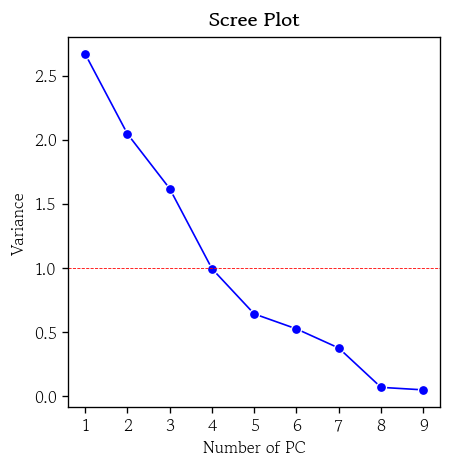

In [52]:
hds.plot.screeplot(X=pca_score)

## 행렬도

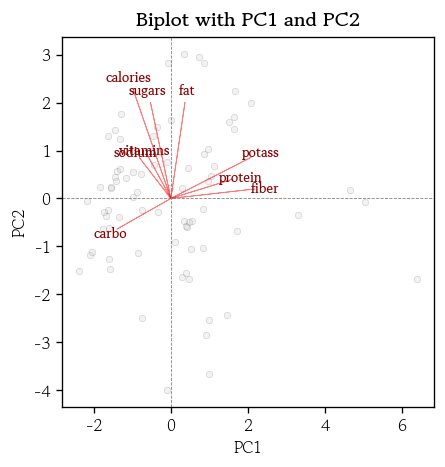

In [53]:
hds.plot.biplot(score=pca_score, coefs=eigenVectors, zoom=4)

## 외부 파일로 저장

In [55]:
os.getcwd()

'/Users/taehyunan/Desktop/Repo/SeSAC/Study/sesac_ml_dl_study_repo/project/code/ml'

In [56]:
os.chdir('../../data')

In [57]:
objs = {
    'df': df,
    'df_scaled': df_scaled,
    'pca_score': pca_score
}

In [58]:
pd.to_pickle(obj=objs, filepath_or_buffer='Cereal.pkl')